<a href="https://colab.research.google.com/github/RepnaiaE/DataScience_Emotion-recognition-methods/blob/main/Lab8_Audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка аудио/Audio processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка аудио данных/Loading audio data

## Файл 10dec_D43_1_mic.wav и его спектрограмма/File 10dec_D43_1_mic.wav and its spectrogram

In [ ]:
import librosa
import numpy as np
y, sr = librosa.load('/content/drive/MyDrive/Распознавание эмоций/audio/10dec_D43_1_mic.wav', sr=64000, mono=True)
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels = 128)
melspec = librosa.power_to_db(melspec).astype(np.float32)

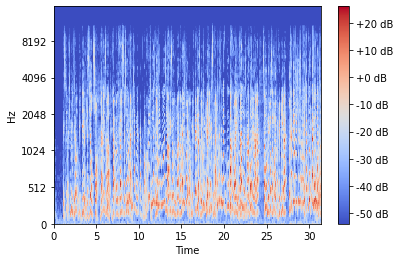

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

librosa.display.specshow(melspec, x_axis='time',  y_axis='mel', sr=sr, fmax=16000)
plt.colorbar(format='%+2.0f dB')

## Файл 10dec_D63_1_mic.wav и его спектрограмма/File 10dec_D63_1_mic.wav and its spectrogram

In [ ]:
import librosa
import numpy as np
y, sr = librosa.load('/content/drive/MyDrive/Распознавание эмоций/audio/10dec_D63_1_mic.wav', sr=64000, mono=True)
melspec2 = librosa.feature.melspectrogram(y, sr=sr, n_mels = 128)
melspec2 = librosa.power_to_db(melspec2).astype(np.float32)

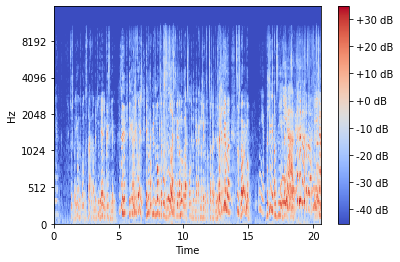

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

librosa.display.specshow(melspec2, x_axis='time',  y_axis='mel', sr=sr, fmax=16000)
plt.colorbar(format='%+2.0f dB')

# Согласованность аннотаторов/Annotator Consistency

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import math

def calc_consistency(data):
    kappa_sum_all = 0.0
    accuracy_all = 0.0
    all_comp = 0

    for annotator, labels in data.items():
        act_class = labels
        for sub_annotator, sub_labels in data.items():
            if sub_annotator == annotator:
                continue

            pred_class = sub_labels

            print(f'Compare {annotator} to {sub_annotator}')
            print(classification_report(act_class, pred_class, output_dict = True))

            accuracy = np.sum([pred_class == act_class])*1.0/(len(pred_class)*11)
            print(f'Accuracy = {accuracy}')

            accuracy_all += accuracy

            kappa_sum = 0.0
            for a1, a2 in zip(pred_class, act_class):
                v = cohen_kappa_score(a1, a2)
                if not math.isnan(v):
                    kappa_sum += v
            print(f'Cohen-kappa = {kappa_sum / len(pred_class)}')

            kappa_sum_all += kappa_sum / len(pred_class)
            all_comp += 1

            print('\n' + '-'*50 + '\n')

    print(f'Total Cohen-kappa = {kappa_sum_all / all_comp}')
    print(f'Total accuracy = {accuracy_all / all_comp}')

## Согласованность для аудио 10dec_D43_1_mic.wav/Consistency for audio 10dec_D43_1_mic.wav

In [ ]:
import pandas as pd

data1 = pd.read_csv('/content/drive/MyDrive/Распознавание эмоций/audio/10dec_D43_2_ann.csv')
annotators = data1['ID'].unique()
annotations1 = {}
for an in annotators:
    df = data1.loc[data1['ID'] == an][['Angry', 'Sad', 'Disgusted', 'Happy', 'Scared', 'Surprised', 'Neutral', 'Domination', 'Submission', 'Shame', 'Tiredness']]
    annotations1[an] = df.to_numpy()

annotations1

In [ ]:
calc_consistency(annotations1)

Compare 1 to 10
{'0': {'precision': 1.0, 'recall': 0.9375, 'f1-score': 0.967741935483871, 'support': 32}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '5': {'precision': 0.14285714285714285, 'recall': 1.0, 'f1-score': 0.25, 'support': 1}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'micro avg': {'precision': 0.9130434782608695, 'recall': 0.9692307692307692, 'f1-score': 0.9402985074626865, 'support': 65}, 'macro avg': {'precision': 0.19480519480

## Согласованность для файла 10dec_D63_1_mic.wav/Consistency for audio 10dec_D63_1_mic.wav

In [ ]:
import pandas as pd

data2 = pd.read_csv('/content/drive/MyDrive/Распознавание эмоций/audio/10dec_D63_1_ann.csv')
annotators = data2['ID'].unique()
annotations2 = {}
for an in annotators:
    df = data2.loc[data2['ID'] == an][['Angry', 'Sad', 'Disgusted', 'Happy', 'Scared', 'Surprised', 'Neutral', 'Domination', 'Submission', 'Shame', 'Tiredness']]
    annotations2[an] = df.to_numpy()

In [ ]:
calc_consistency(annotations2)

Compare 1 to 10
{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '2': {'precision': 0.25, 'recall': 1.0, 'f1-score': 0.4, 'support': 1}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8}, '4': {'precision': 0.5882352941176471, 'recall': 1.0, 'f1-score': 0.7407407407407407, 'support': 10}, '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '8': {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.975609756097561, 'support': 21}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'micro avg': {'precision': 0.7560975609756098, 'recall': 0.7560975609756098, 'f1-score': 0.7560975609756099, 'support': 41}, 'macro avg': {

# Выводы/Conclusion

Общая согласованность по Cohen - Kappa:
* 10dec_D43_1_mic.wav - 81%
* 10dec_D63_1_mic.wav - 63%

General agreement according to Cohen - Kappa:

10dec_D43_1_mic.wav - 81%
10dec_D63_1_mic.wav - 63%